# Dataset: Condition Based Maintenance of Naval Propulsion Plants

**Eduardo Carrasco**
Estudiante Doctorado en Ingeniería de Sistemas Complejos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv('Dataset/data.csv', sep=',')
df

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [2]:
df.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

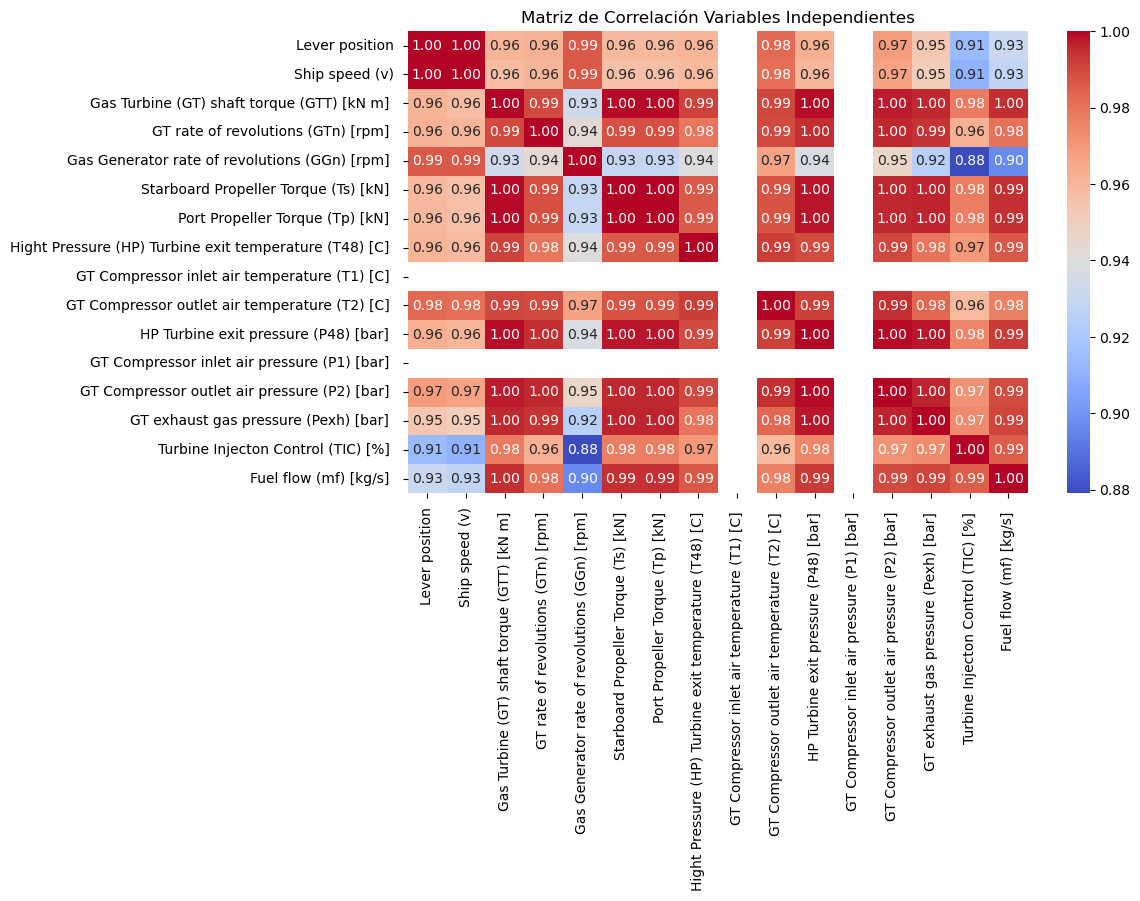

In [3]:
df_independientes = df.iloc[:, :16]
matriz_correlacion = df_independientes.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Variables Independientes')
plt.show()

In [4]:
df_filtrado = df_independientes.drop(df_independientes.columns[[0, 2, 3, 5, 6, 8, 10, 11, 13]], axis=1)
print(df_filtrado.columns)

Index(['Ship speed (v) ', 'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  '],
      dtype='object')


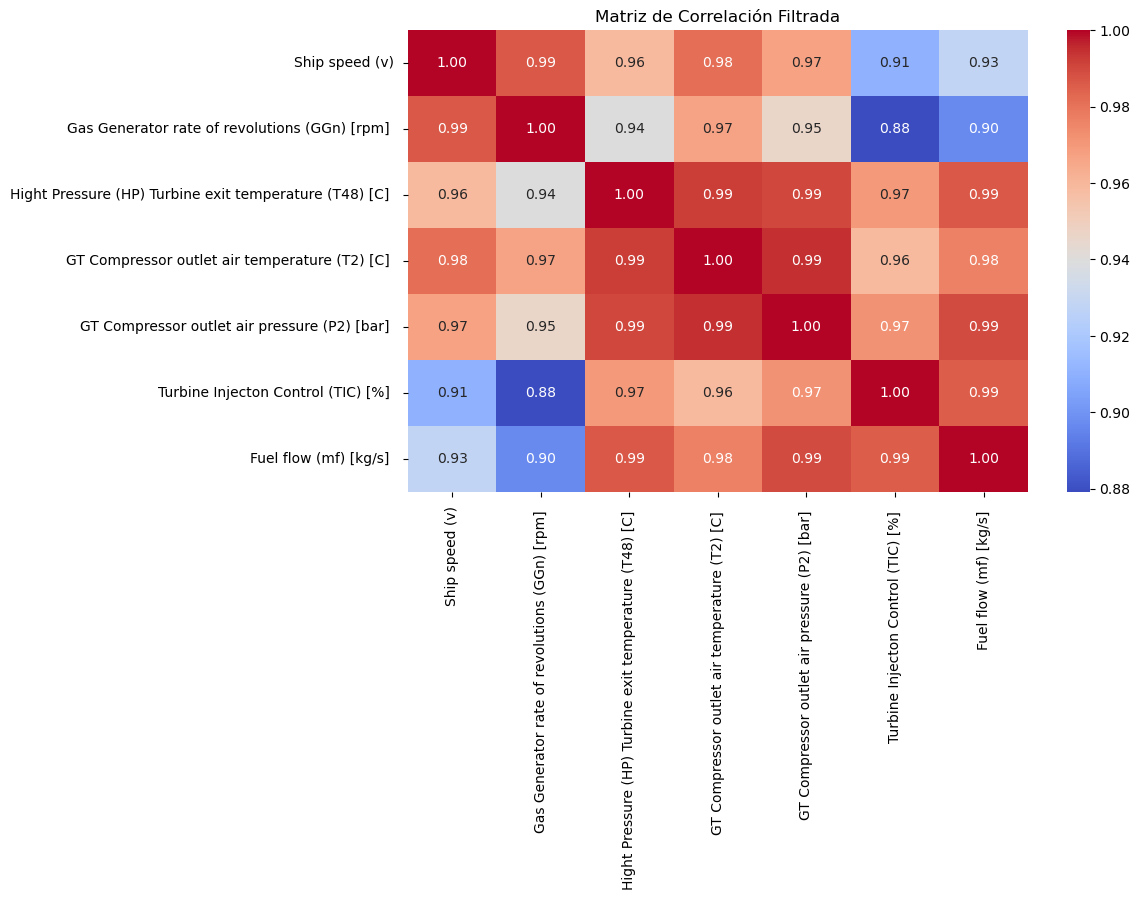

In [5]:
matriz_correlacion = df_filtrado.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Filtrada')
plt.show()

In [6]:
df1=df
print(df1[df1.columns[17]].describe())

count    11934.0000
mean         0.9875
std          0.0075
min          0.9750
25%          0.9810
50%          0.9875
75%          0.9940
max          1.0000
Name: GT Turbine decay state coefficient , dtype: float64


In [7]:
bins = [0, 0.981, 0.994, 1]
labels = ['Urgent', 'Preventive', 'Normal']
df1['GT Turbine decay state coefficient_class'] = pd.cut(df1['GT Turbine decay state coefficient '], 
                                                        bins=bins, labels=labels, include_lowest=True)

In [8]:
df1.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient ',
       'GT Turbine decay state coefficient_class'],
      dtype='object')

In [9]:
df1 = df1.drop(df.columns[[0, 2, 3, 5, 6, 8, 10, 11, 13, 16]], axis=1)
df1

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
0,3,6677.380,464.006,550.563,5.947,7.137,0.082,0.975,Urgent
1,6,6828.469,635.401,581.658,7.282,10.655,0.287,0.975,Urgent
2,9,7111.811,606.002,587.587,7.574,13.086,0.259,0.975,Urgent
3,12,7792.630,661.471,613.851,9.007,18.109,0.358,0.975,Urgent
4,15,8494.777,731.494,645.642,11.197,26.373,0.522,0.975,Urgent
...,...,...,...,...,...,...,...,...,...
11929,15,8470.013,681.658,628.950,10.990,23.803,0.471,1.000,Normal
11930,18,8800.352,747.405,658.853,13.109,32.671,0.647,1.000,Normal
11931,21,9120.889,796.457,680.393,15.420,42.104,0.834,1.000,Normal
11932,24,9300.274,892.945,722.029,18.293,58.064,1.149,1.000,Normal


In [10]:
df1.describe(include='all')

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0000,11934
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preventive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5967
mean,15.000000,8200.947312,735.495446,646.215331,12.297123,33.641261,0.662440,0.9875,NaN
std,7.746291,1091.315507,173.680552,72.675882,5.337448,25.841363,0.507132,0.0075,NaN
min,3.000000,6589.002000,442.364000,540.442000,5.828000,0.000000,0.068000,0.9750,NaN
25%,9.000000,7058.324000,589.872750,578.092250,7.447250,13.677500,0.246000,0.9810,NaN
50%,15.000000,8482.081500,706.038000,637.141500,11.092000,25.276500,0.496000,0.9875,NaN
75%,21.000000,9132.606000,834.066250,693.924500,15.658000,44.552500,0.882000,0.9940,NaN


In [11]:
df1.columns

Index(['Ship speed (v) ', 'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Turbine decay state coefficient ',
       'GT Turbine decay state coefficient_class'],
      dtype='object')

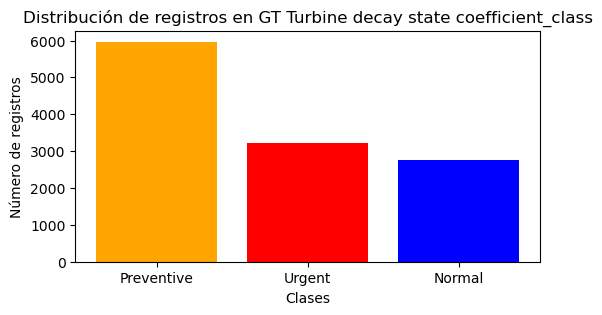

In [13]:
import matplotlib.pyplot as plt

column_name = "GT Turbine decay state coefficient_class"

class_count = df1[column_name].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(class_count.index, class_count.values, color=['orange', 'red', 'blue'])

plt.xlabel('Clases')
plt.ylabel('Número de registros')
plt.title(f'Distribución de registros en {column_name}')

plt.show()

In [14]:
count_labels = df1['GT Turbine decay state coefficient_class'].value_counts()

print(count_labels)

Preventive    5967
Urgent        3213
Normal        2754
Name: GT Turbine decay state coefficient_class, dtype: int64


## Chernoff Faces:

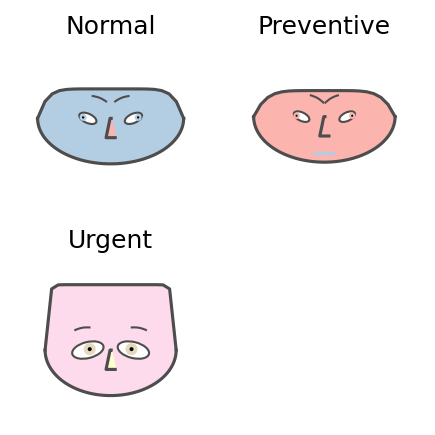

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ChernoffFace import chernoff_face
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df_to_normalize = df1.iloc[:, :7]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)
df_normalized['GT Turbine decay state coefficient_class'] = df1['GT Turbine decay state coefficient_class']

sample_urgent = df_normalized[df_normalized['GT Turbine decay state coefficient_class'] == 'Normal'].sample(n=1)
sample_preventive = df_normalized[df_normalized['GT Turbine decay state coefficient_class'] == 'Preventive'].sample(n=1)
sample_normal = df_normalized[df_normalized['GT Turbine decay state coefficient_class'] == 'Urgent'].sample(n=1)

sample_df = pd.concat([sample_urgent, sample_preventive, sample_normal])

data = sample_df.iloc[:, :7].to_numpy()

titles = sample_df['GT Turbine decay state coefficient_class'].to_list()

fig = chernoff_face(data=data, 
                    titles=titles, 
                    color_mapper=plt.cm.Pastel1,
                    figsize=(3, 3), dpi=150)

fig.tight_layout()
plt.show()

In [17]:
sample_urgent

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient_class
416,0.25,0.1784,0.218057,0.176705,0.092479,0.133897,0.10034,Normal


In [18]:
sample_preventive

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient_class
8299,0.125,0.06349,0.172717,0.106084,0.064464,0.0,0.073696,Preventive


In [19]:
sample_normal

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient_class
970,0.875,0.85041,0.748259,0.802447,0.736657,0.669767,0.657029,Urgent


In [20]:
sample_df

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient_class
416,0.250,0.17840,0.218057,0.176705,0.092479,0.133897,0.100340,Normal
8299,0.125,0.06349,0.172717,0.106084,0.064464,0.000000,0.073696,Preventive
970,0.875,0.85041,0.748259,0.802447,0.736657,0.669767,0.657029,Urgent


## Análisis de Componentes Principales:

### PCA:

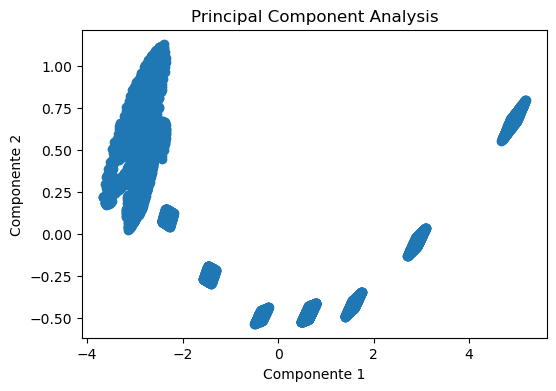

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_filtrado)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('Principal Component Analysis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [22]:
pca_result

array([[-3.47190838,  0.35886895],
       [-2.43445719,  0.44790835],
       [-2.19103928,  0.12216411],
       ...,
       [ 1.39162151, -0.49384466],
       [ 2.70154371, -0.13241672],
       [ 4.67498613,  0.55419661]])

### t-SNE:

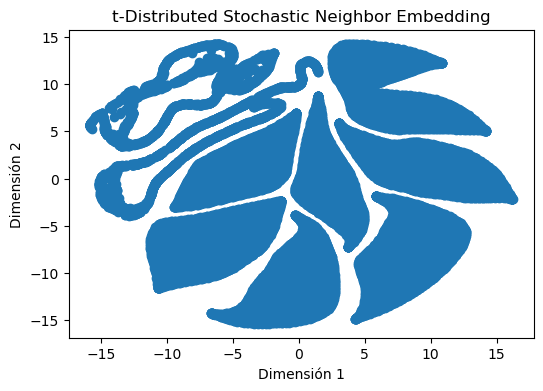

In [23]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(df_normalized)

plt.figure(figsize=(6, 4))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-Distributed Stochastic Neighbor Embedding')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

In [24]:
tsne_result

array([[-12.679729 ,   8.562398 ],
       [  1.4311563,  11.301516 ],
       [ -0.1987351,   6.955657 ],
       ...,
       [  4.2806506, -14.847783 ],
       [ 16.201    ,  -2.173212 ],
       [ 14.189847 ,   5.054433 ]], dtype=float32)

## Técnicas de Clustering:

### Clasificación Binomial:

In [41]:
df2=df
df2

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975,0
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975,0
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975,0
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975,0
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000,1
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000,1
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000,1
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000,1


In [42]:
print(df2[df2.columns[17]].describe())

count    11934.0000
mean         0.9875
std          0.0075
min          0.9750
25%          0.9810
50%          0.9875
75%          0.9940
max          1.0000
Name: GT Turbine decay state coefficient , dtype: float64


In [43]:
bins = [0, 0.987530, 1]
labels = [0, 1]
df2['GT Turbine decay state coefficient_class'] = pd.cut(df2['GT Turbine decay state coefficient '], 
                                                        bins=bins, labels=labels, include_lowest=True)

In [44]:
df2 = df2.drop(df.columns[[0, 2, 3, 5, 6, 8, 10, 11, 13, 16]], axis=1)
df2

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
0,3,6677.380,464.006,550.563,5.947,7.137,0.082,0.975,0
1,6,6828.469,635.401,581.658,7.282,10.655,0.287,0.975,0
2,9,7111.811,606.002,587.587,7.574,13.086,0.259,0.975,0
3,12,7792.630,661.471,613.851,9.007,18.109,0.358,0.975,0
4,15,8494.777,731.494,645.642,11.197,26.373,0.522,0.975,0
...,...,...,...,...,...,...,...,...,...
11929,15,8470.013,681.658,628.950,10.990,23.803,0.471,1.000,1
11930,18,8800.352,747.405,658.853,13.109,32.671,0.647,1.000,1
11931,21,9120.889,796.457,680.393,15.420,42.104,0.834,1.000,1
11932,24,9300.274,892.945,722.029,18.293,58.064,1.149,1.000,1


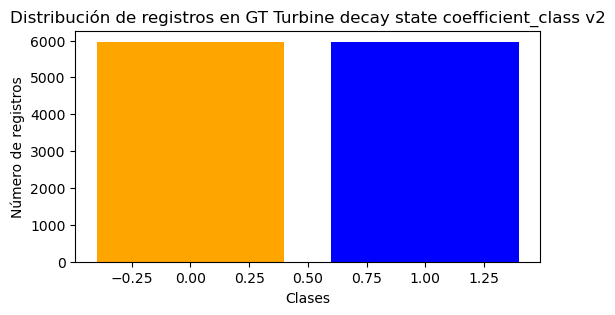

In [45]:
import matplotlib.pyplot as plt

column_name = "GT Turbine decay state coefficient_class"

class_count = df2[column_name].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(class_count.index, class_count.values, color=['orange', 'blue'])

plt.xlabel('Clases')
plt.ylabel('Número de registros')
plt.title(f'Distribución de registros en {column_name} v2')

plt.show()

In [46]:
count_labels = df2['GT Turbine decay state coefficient_class'].value_counts()

print(count_labels)

0    5967
1    5967
Name: GT Turbine decay state coefficient_class, dtype: int64


### División 2 Set datos:

In [47]:
from sklearn.model_selection import train_test_split

df2_1, df2_2 = train_test_split(df2, test_size=0.2, random_state=42)

### Uso Set de Datos 2_1

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
import pandas as pd

X = df2_1.iloc[:, :7]

y = df2_1['GT Turbine decay state coefficient_class']

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y) 
lda_labels = lda.predict(X)

df2_1['LDA_Labels'] = lda_labels

gmm = GaussianMixture(n_components=2) 
gmm.fit(X)
gmm_labels = gmm.predict(X)

df2_1['GMM_Labels'] = gmm_labels

In [63]:
df2_1

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class,LDA_Labels,GMM_Labels
3685,15,8497.497,704.972,638.429,11.004,24.951,0.494,0.994,1,1,0
5886,3,6622.351,545.800,557.982,6.450,26.222,0.194,0.979,0,0,1
6108,21,9120.644,835.034,691.451,15.730,44.789,0.887,0.977,0,0,0
7713,3,6697.636,620.925,570.351,7.078,0.000,0.278,1.000,1,0,1
3499,24,9319.460,917.854,733.407,18.180,59.577,1.179,0.999,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,24,9292.800,915.018,725.973,18.693,60.083,1.189,0.980,0,0,0
5191,24,9306.729,933.160,734.056,18.621,61.190,1.211,0.979,0,0,0
5390,27,9751.200,1089.292,780.775,22.961,90.760,1.797,0.975,0,1,0
860,18,8842.649,779.989,671.876,13.129,34.453,0.682,0.992,1,1,0


In [64]:
count_labels = df2_1['GMM_Labels'].value_counts()

print(count_labels)

0    5279
1    4268
Name: GMM_Labels, dtype: int64


In [65]:
count_labels = df2_1['LDA_Labels'].value_counts()

print(count_labels)

1    5232
0    4315
Name: LDA_Labels, dtype: int64


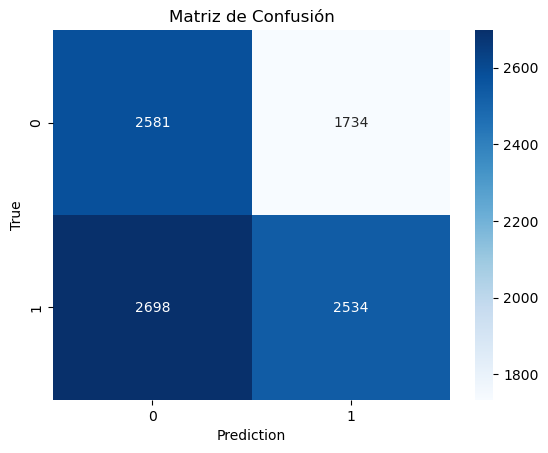

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df2_1['LDA_Labels']

y_pred = df2_1['GMM_Labels']

conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

In [67]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, labels=[0, 1])

print("Informe de clasificación:")
print(report)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54      4315
           1       0.59      0.48      0.53      5232

    accuracy                           0.54      9547
   macro avg       0.54      0.54      0.54      9547
weighted avg       0.55      0.54      0.54      9547



### Uso del Set de datos 2_2:

In [68]:
df2_2

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
10172,9,7045.840,576.879,576.548,7.506,11.961,0.237,0.987,0
10322,27,9728.709,1064.615,773.249,23.045,88.928,1.760,0.977,0
9195,21,9117.010,821.362,686.661,15.687,43.923,0.870,0.982,0
357,21,9138.462,840.619,697.393,15.460,44.791,0.887,0.988,1
4352,18,8824.273,774.265,668.631,13.185,34.208,0.677,0.990,1
...,...,...,...,...,...,...,...,...,...
7388,27,9754.242,1068.077,775.818,22.632,88.646,1.755,0.989,1
7176,12,7757.985,632.714,604.558,8.882,16.839,0.333,0.992,1
5721,21,9126.158,827.086,690.517,15.569,44.125,0.874,0.986,0
267,21,9133.424,850.929,699.107,15.630,45.600,0.903,0.978,0


In [86]:
sample_critical = df2_2[df2_2['GT Turbine decay state coefficient_class'] == 0].sample(n=5)
sample_operational = df2_2[df2_2['GT Turbine decay state coefficient_class'] == 1].sample(n=5)
sample_df2_2 = pd.concat([sample_critical, sample_operational])
sample_df2_2

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class
2874,12,7778.879,649.580,610.050,8.955,17.587,0.348,0.982,0
11562,21,9113.862,811.930,683.191,15.669,43.335,0.858,0.985,0
5170,15,8475.422,717.707,639.763,11.207,25.730,0.509,0.977,0
4453,24,9306.912,939.413,735.678,18.695,61.703,1.222,0.975,0
10537,24,9292.106,922.313,727.726,18.785,60.689,1.201,0.975,0
428,18,8848.979,776.761,671.511,13.071,34.224,0.678,0.996,1
6962,18,8816.658,764.322,665.117,13.152,33.643,0.666,0.994,1
5271,21,9128.132,826.380,690.793,15.529,44.034,0.872,0.988,1
2714,18,8831.833,777.918,670.338,13.172,34.387,0.681,0.990,1
668,9,7164.169,587.161,583.864,7.415,12.310,0.244,0.997,1


In [87]:
X_new = sample_df2_2.iloc[:, :7]

new_lda_labels = lda.predict(X_new)

new_gmm_labels = gmm.predict(X_new)

sample_df2_2['New_LDA_Labels'] = new_lda_labels
sample_df2_2['New_GMM_Labels'] = new_gmm_labels

In [88]:
sample_df2_2

,Ship speed (v),Gas Generator rate of revolutions (GGn) [rpm],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],GT Compressor outlet air pressure (P2) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Turbine decay state coefficient,GT Turbine decay state coefficient_class,New_LDA_Labels,New_GMM_Labels
2874,12,7778.879,649.580,610.050,8.955,17.587,0.348,0.982,0,1,1
11562,21,9113.862,811.930,683.191,15.669,43.335,0.858,0.985,0,0,0
5170,15,8475.422,717.707,639.763,11.207,25.730,0.509,0.977,0,1,0
4453,24,9306.912,939.413,735.678,18.695,61.703,1.222,0.975,0,0,0
10537,24,9292.106,922.313,727.726,18.785,60.689,1.201,0.975,0,0,0
428,18,8848.979,776.761,671.511,13.071,34.224,0.678,0.996,1,1,0
6962,18,8816.658,764.322,665.117,13.152,33.643,0.666,0.994,1,1,0
5271,21,9128.132,826.380,690.793,15.529,44.034,0.872,0.988,1,0,0
2714,18,8831.833,777.918,670.338,13.172,34.387,0.681,0.990,1,1,0
668,9,7164.169,587.161,583.864,7.415,12.310,0.244,0.997,1,1,1


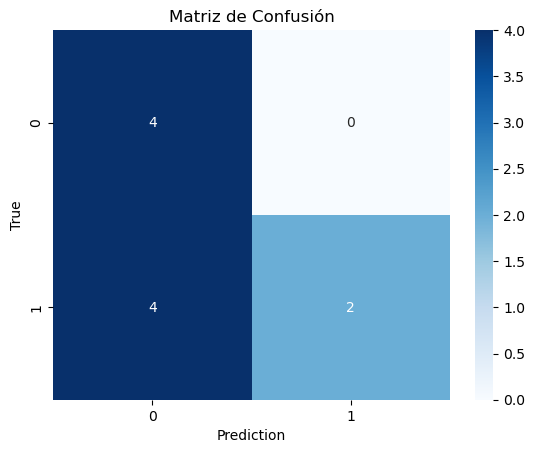

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = sample_df2_2['New_LDA_Labels']

y_pred = sample_df2_2['New_GMM_Labels']

conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

In [90]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, labels=[0, 1])

print("Informe de clasificación:")
print(report)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.33      0.50         6

    accuracy                           0.60        10
   macro avg       0.75      0.67      0.58        10
weighted avg       0.80      0.60      0.57        10

